# 라이브러리 Import 및 데이터 Read

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# 분석 데이터 Read
data = pd.read_csv('data/boston.csv')

# head(): 상위 5개 row 출력
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 설명

- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

# Feature Selection

: `상관계수`와 `공분산`을 바탕으로 의미 있는 Feature(변수)를 선택

## 가설1 - 범죄율이 높을수록 집 값이 낮아진다

In [13]:
# 상관계수와 공분산은 연속형자료를 분석
# 범주형변수를 제거 (사용x)
del data['rad']
del data['chas']

In [14]:
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


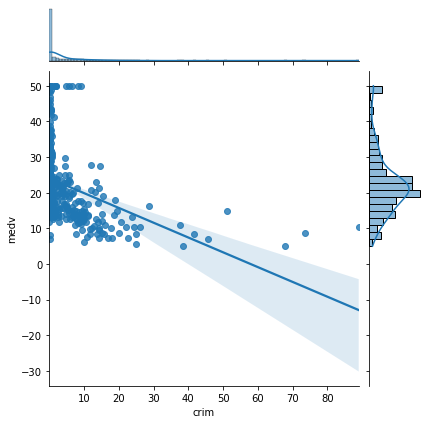

In [16]:
# 집 값과 범죄율의 상관관계
sns.jointplot(data = data, x = 'crim', y = 'medv', kind = 'reg')

## 확실한 근거를 위해 공분산과 상관계수 check
#### `x.cov(y)`

- 공분산 확인 함수
- x와 y에 같은 시리즈형의 데이터 대입
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산

In [18]:
# Column 별 공분산 확인
data.cov()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
crim,73.986578,-40.215956,23.992339,0.419594,-1.325038,85.405322,-6.876722,844.821538,5.399331,-302.381816,27.986168,-30.718508
zn,-40.215956,543.936814,-85.412648,-1.396148,5.112513,-373.901548,32.629304,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
indus,23.992339,-85.412648,47.064442,0.607074,-1.887957,124.513903,-10.228097,833.360290,5.692104,-223.579756,29.580270,-30.520823
nox,0.419594,-1.396148,0.607074,0.013428,-0.024603,2.385927,-0.187696,13.046286,0.047397,-4.020570,0.488946,-0.455412
rm,-1.325038,5.112513,-1.887957,-0.024603,0.493671,-4.751929,0.303663,-34.583448,-0.540763,8.215006,-3.079741,4.493446
age,85.405322,-373.901548,124.513903,2.385927,-4.751929,792.358399,-44.329379,2402.690122,15.936921,-702.940328,121.077725,-97.589017
dis,-6.876722,32.629304,-10.228097,-0.187696,0.303663,-44.329379,4.434015,-189.664592,-1.059775,56.040356,-7.473329,4.840229
tax,844.821538,-1236.453735,833.360290,13.046286,-34.583448,2402.690122,-189.664592,28404.759488,168.153141,-6797.911215,654.714520,-726.255716
ptratio,5.399331,-19.776571,5.692104,0.047397,-0.540763,15.936921,-1.059775,168.153141,4.686989,-35.059527,5.782729,-10.110657
b,-302.381816,373.721402,-223.579756,-4.020570,8.215006,-702.940328,56.040356,-6797.911215,-35.059527,8334.752263,-238.667516,279.989834


In [17]:
# 범죄율과 집 값의 공분산 확인
data['crim'].cov(data['medv'])

-30.718507964458176

#### `x.corr(y)`

- 상관계수 확인 함수
- x와 y에 같은 시리즈형의 데이터 대입
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산

In [21]:
# 범죄율과 집 값의 상관계수 확인
data['crim'].corr(data['medv'])

-0.3883046085868114

- -0.1 ~ -0.3: 약한 상관관계
- -0.3~ -0.6: 강한 상관관계
#### 범죄율과 집 값은 강한 상관관계를 가지고 있고 음의 방향으로 상관성이 있음

## 가설2 - 방의 개수가 많을수록 집 값이 높아진다

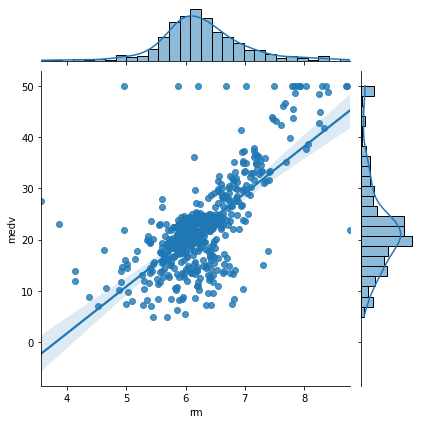

In [22]:
# 집 값과 방의 개수의 상관관계
sns.jointplot(data = data, x='rm', y='medv', kind = 'reg')

### 공분산의 정도는 낮아도 상관계수는 높을 수 있음을 확인
- 절대적 숫자만 보면 범죄율이 더 상관성이 커보임
- 절대적인 숫자 자체가 방의 개수는 3 to 9, 범죄율은 0 to 80이기 때문에 숫자는 범죄율이 높음
- 공분산은 범죄율이 높을 수 밖에 없음 (공분산의 허점 확인)

In [23]:
# 상관관계 확인
data['rm'].corr(data['medv'])

0.6953599470715388

In [24]:
# 공분산 확인
data['rm'].cov(data['medv'])

4.493445879544474

#### `sns.heatmap(df, cmap, annot, fmt)`

- heatmap의 심화
- cmap - 전체적인 색을 지정 (summer /  YlGnBu / RdYlGn_r 등)
- annot - True / False 로써 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소숫점 자리수 설정

<AxesSubplot:>

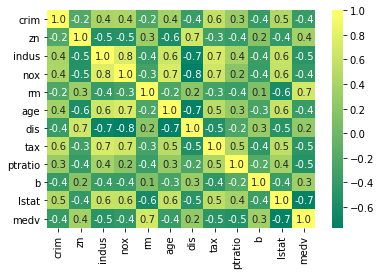

In [25]:
sns.heatmap(data.corr(),cmap='summer',annot=True,fmt="0.1f")

#### `plt.figure(figsize = (가로, 세로))`

- 도화지의 크기 설정

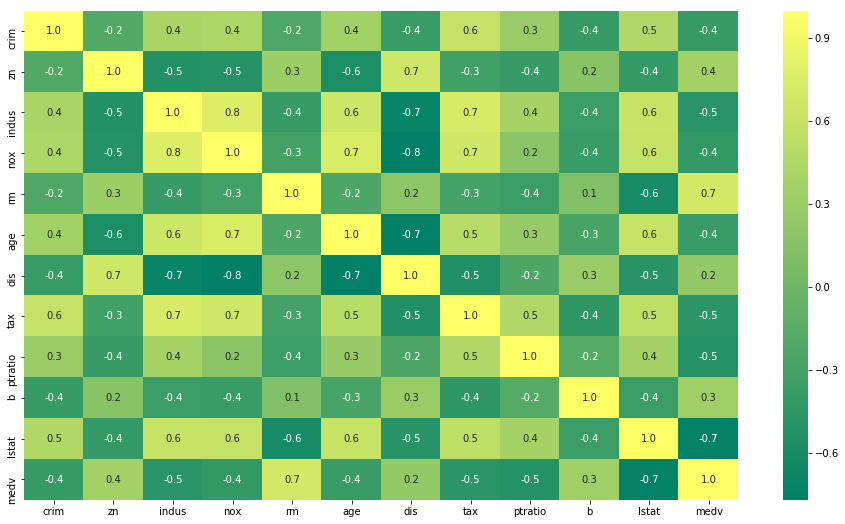

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),cmap='summer',annot=True,fmt="0.1f")

# Feature Extraction

: `변수 추출`, 1, 2, 3번 변수를 조합하여 A, B라는 변수를 생성

`PCA`를 이용하여 새로운 변수 생성

In [26]:
# 변수들의 상관계수 확인
corr_bar = []
for column in data.columns :
    print(f'{column}과 medv의 상관관계 : {data["medv"].corr(data[column])}\n')
    corr_bar.append(data["medv"].corr(data[column]))

crim과 medv의 상관관계 : -0.3883046085868113

zn과 medv의 상관관계 : 0.3604453424505433

indus과 medv의 상관관계 : -0.48372516002837285

nox과 medv의 상관관계 : -0.42732077237328236

rm과 medv의 상관관계 : 0.6953599470715388

age과 medv의 상관관계 : -0.376954565004596

dis과 medv의 상관관계 : 0.24992873408590388

tax과 medv의 상관관계 : -0.4685359335677669

ptratio과 medv의 상관관계 : -0.5077866855375615

b과 medv의 상관관계 : 0.33346081965706637

lstat과 medv의 상관관계 : -0.7376627261740147

medv과 medv의 상관관계 : 1.0



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

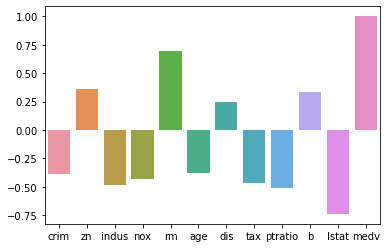

In [27]:
sns.barplot(data.columns, corr_bar)

In [28]:
# 수치형데이터 중 비교적 상관계수가 낮은 두개의 변수 선택
x = data[['dis', 'b']]

In [29]:
# PCA를 위한 라이브러리
from sklearn.decomposition import PCA

#### `PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다.
- 객체를 생성하는 개념

#### `PCA.fit(x)`

- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

#### `PCA.components_`

- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도

#### `PCA.explained_variance_ratio_`

- 새로운 변수가 설명하는 분산의 비율

#### `PCA.fit_transform`

- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [42]:
# 2개의 변수를 조합하여 1개의 변수 생성
pca = PCA(n_components=1)

# 데이터 학습
pca.fit(x)

PCA(n_components=1)

In [33]:
# 새로운 변수에 담긴 각 변수의 분산 확인
pca.components_

array([[-0.00672682, -0.99997737]])

In [34]:
# 새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.9995135])

In [41]:
# 새로운 변수를 pc1이라는 컬럼에 추가 (학습과 변환을 동시에 수행하는 함수)
data['pc1'] = pca.fit_transform(x)
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-40.240309


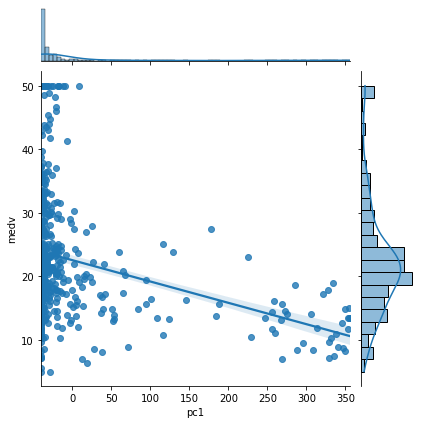

In [37]:
# 새로운 변수와 집 값의 상관관계를 확인
sns.jointplot(data=data, x = 'pc1', y='medv', kind='reg')

#### b과 medv의 상관관계와 매우 유사
- 절대적인 상관성 정도가 비슷함
- 두 가지 변수를 하나로 줄이는 개념이 쓸모 없어짐
- 흑인 비율을 너무 많이 담았기 때문
- 정규화를 통해 줄일 수 ㅇ

In [43]:
# 상관계수 확인
data['pc1'].corr(data['medv'])

-0.3334845106741897

# Normalization

#### `StandardScaler()`

- 정규화 객체 생성

#### `scaler.fit(x)`

- 정규화 객체로 학습

#### `scaler.transform(x)`

- 학습된 학습기로 변수 x의 데이터를 변환

In [44]:
# 정규화에 필요한 라이브러리
from sklearn.preprocessing import StandardScaler

In [45]:
# 정규화 객체 생성
scaler = StandardScaler()

# x를 학습시킨 후 변형하여 정규환된 x로 만들어 봅니다.
scaler.fit(x)
scaler_x = scaler.transform(x)

### 반복 작업

In [47]:
# PCA의 개수를 찾기
pca = PCA(n_components = 1)

# 정규화된 데이터를 학습
pca.fit(scaler_x)

# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인 (두 개가 비슷하게(같게) 설정됨)
pca.components_

array([[-0.70710678, -0.70710678]])

In [50]:
# 새로운 변수 PC1이 설명하는 분산의 비율
# 두 가지 변수를 함께 담았기 때문에 낮아짐
pca.explained_variance_ratio_

array([0.64575584])

In [53]:
# 위와 같이 pc1의 컬럼에 데이터 삽입
data['pc1'] = pca.fit_transform(scaler_x)
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-1.073946


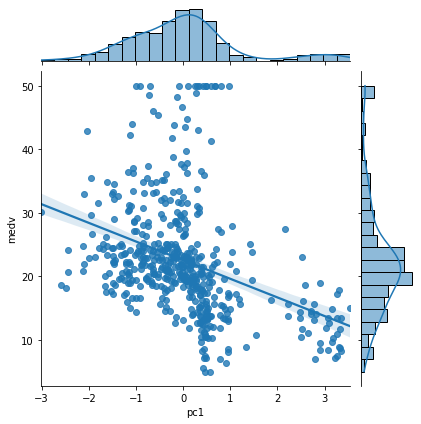

In [52]:
sns.jointplot(data=data, x = 'pc1', y='medv', kind='reg')

In [54]:
data['pc1'].corr(data['medv'])

-0.362989851000902

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='b', ylabel='Density'>

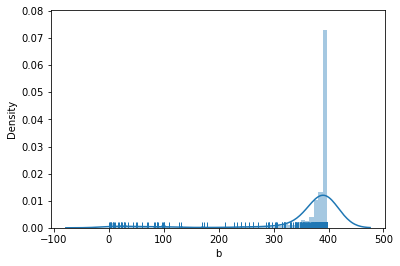

In [55]:
sns.distplot(x['b'], kde=True, rug=True)